In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# In order to download to drive we mount our google drives to colab.
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


# Data Cleaning

In [ ]:
groups = pd.read_excel("/content/drive/My Drive/EC 438 experiment/Treatment.xlsx").iloc[[0,3,4,5],2:]

groups = groups.T
groups.columns = ["name", "gm1", "gm2", "gm3"]
groups.gm1 = groups.gm1.apply(lambda x: int(x[0:x.find(":")]))
groups.gm2 = groups.gm2.apply(lambda x: int(x[0:x.find(":")]))
groups.gm3 = groups.gm3.apply(lambda x: int(x[0:x.find(":")]))

groups = groups.reset_index(drop=False , )
groups = groups.rename(columns= {"index" : "tr2_id"})
groups.tr2_id = groups.tr2_id.apply(lambda x: x[3:]).astype(int)

gr_dict = {}
j=0
for i in groups.index:
  my_gr = set(groups.loc[i, ["tr2_id", "gm1", "gm2", "gm3"]].values)
  if my_gr in gr_dict.values(): 
    groups.loc[i, "group"] = list(gr_dict.keys())[list(gr_dict.values()).index(my_gr)]
  else:
    j += 1
    gr_dict["group_" + str(j)] = my_gr
    groups.loc[i, "group"] = "group_" + str(j)

groups

,tr2_id,name,gm1,gm2,gm3,group
0,1,Elif Kurt,2,28,29,group_1
1,2,Ipek Gur,28,1,29,group_1
2,3,yunus emre bilgili,23,14,4,group_2
3,4,gokhan seheri,3,23,14,group_2
4,5,cem erciyastepe,21,7,39,group_3
5,6,su akarsu,27,34,37,group_4
6,7,Kaan Basdil,21,5,39,group_3
7,8,emrecan yerlikaya,30,31,20,group_5
8,9,Evrim Belli,25,26,10,group_6
9,10,oguz turan,25,26,9,group_6


In [ ]:
#groups.to_excel("/content/drive/My Drive/EC 438 experiment/groups.xlsx")

In [ ]:
groups = pd.read_excel("/content/drive/My Drive/EC 438 experiment/groups.xlsx").drop("Unnamed: 0",  1)
groups

,tr2_id,tr1_id,name,gm1,gm2,gm3,group
0,1,34,Elif Kurt,2,28,29,group_1
1,2,22,Ipek Gur,28,1,29,group_1
2,3,7,yunus emre bilgili,23,14,4,group_2
3,4,40,gokhan seheri,3,23,14,group_2
4,5,18,cem erciyastepe,21,7,39,group_3
5,6,35,su akarsu,27,34,37,group_4
6,7,11,Kaan Basdil,21,5,39,group_3
7,8,9,emrecan yerlikaya,30,31,20,group_5
8,9,15,Evrim Belli,25,26,10,group_6
9,10,14,oguz turan,25,26,9,group_6


In [ ]:
tr1_data = pd.read_excel("/content/drive/My Drive/EC 438 experiment/ec 438 - experiment data.xlsx").iloc[:, [0,1,2,7,8,9]]
tr1_data

,Round,ID,Contribution,Earnings,Cumulative Earnings,Other Id:
0,1,1,0,350.00,360.00,"ID7:0, ID40:50, ID30:100"
1,1,2,0,293.00,303.00,"ID22:0, ID20:93, ID28:0"
2,1,3,50,250.00,260.00,"ID33:50, ID21:0, ID8:50"
3,1,4,30,232.00,242.00,"ID35:7, ID13:35, ID14:20"
4,1,5,50,195.00,205.00,"ID11:0, ID34:25, ID12:20"
...,...,...,...,...,...,...
155,4,36,100,245.00,915.00,"ID38:30, ID6:60, ID32:55"
156,4,37,0,200.00,841.00,"ID19:0, ID25:0, ID15:0"
157,4,38,30,385.00,"1,541.00","ID6:60, ID36:100, ID32:55"
158,4,39,0,225.00,988.00,"ID10:0, ID24:25, ID18:0"


In [ ]:
all_data = pd.read_excel("/content/drive/My Drive/EC 438 experiment/Treatment.xlsx", sheet_name=2, skiprows=15)
exp_data = all_data.iloc[0:160, [0,1,2,7,8,9]]
chat_data = all_data.iloc[162:292, 0:2]
chat_data.columns = ["round", "message"]
chat_data.loc[162:195, "round"] = 1
chat_data.loc[195:229, "round"] = 2
chat_data.loc[229:264, "round"] = 3
chat_data.loc[264:, "round"] = 4
chat_data = chat_data.drop([162, 195, 229, 264])
chat_data["id"] = chat_data.message.apply(lambda x: int(x[2:x.find(":")]))
chat_data = chat_data.merge(groups[["tr2_id", "group"]], how = "left", left_on="id", right_on="tr2_id").drop("id",1)
chat_data

,round,message,tr2_id,group
0,1,ID1: ^hepsini koyalm ortaya (1620303967)^cevap...,1,group_1
1,1,ID3: ^yatryor muyuz ya :P (1620303999),3,group_2
2,1,ID4: ^yatrn :) (1620303971)^yatirin (1620303980),4,group_2
3,1,ID5: ^100 invest yapmayan dersi droplasn ya (1...,5,group_3
4,1,ID6: ^selam (1620303998)^100 m (1620304012)^10...,6,group_4
...,...,...,...,...
121,4,ID34: ^iyilik yap denize at (1620304668)^100 a...,34,group_4
122,4,ID35: ^durustluk bozuldu galiba kimsenin kimse...,35,group_7
123,4,ID37: ^hic bisi diyemiyorum (1620304650)^priso...,37,group_4
124,4,ID38: ^sylencek bii kalmad dayanma ruhu yok bu...,38,group_9


In [ ]:
groups = pd.read_excel("/content/drive/My Drive/EC 438 experiment/groups.xlsx").drop("Unnamed: 0",  1)
groups = groups.merge(tr1_data.loc[tr1_data.Round==1, ["Round", "ID", "Contribution"]], how = "left", left_on="tr1_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr1_r1_contribution"})

groups = groups.merge(tr1_data.loc[tr1_data.Round==2, ["Round", "ID", "Contribution"]], how = "left", left_on="tr1_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr1_r2_contribution"})

groups = groups.merge(tr1_data.loc[tr1_data.Round==3, ["Round", "ID", "Contribution"]], how = "left", left_on="tr1_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr1_r3_contribution"})

groups = groups.merge(tr1_data.loc[tr1_data.Round==4, ["Round", "ID", "Contribution"]], how = "left", left_on="tr1_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr1_r4_contribution"})


groups = groups.merge(exp_data.loc[exp_data.Round==1, ["Round", "ID", "Contribution"]], how = "left", left_on="tr2_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr2_r1_contribution"})

groups = groups.merge(exp_data.loc[exp_data.Round==2, ["Round", "ID", "Contribution"]], how = "left", left_on="tr2_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr2_r2_contribution"})

groups = groups.merge(exp_data.loc[exp_data.Round==3, ["Round", "ID", "Contribution"]], how = "left", left_on="tr2_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr2_r3_contribution"})

groups = groups.merge(exp_data.loc[exp_data.Round==4, ["Round", "ID", "Contribution"]], how = "left", left_on="tr2_id", right_on="ID").drop(["Round", "ID"], 1)
groups = groups.rename(columns={"Contribution" : "tr2_r4_contribution"})
              
groups

,tr2_id,tr1_id,name,gm1,gm2,gm3,group,tr1_r1_contribution,tr1_r2_contribution,tr1_r3_contribution,tr1_r4_contribution,tr2_r1_contribution,tr2_r2_contribution,tr2_r3_contribution,tr2_r4_contribution
0,1,34,Elif Kurt,2,28,29,group_1,25,50,100,55,100.0,100.0,0.0,0.0
1,2,22,Ipek Gur,28,1,29,group_1,0,0,0,0,0.0,0.0,3.0,0.0
2,3,7,yunus emre bilgili,23,14,4,group_2,0,0,0,0,0.0,1.0,0.0,0.0
3,4,40,gokhan seheri,3,23,14,group_2,50,40,0,10,100.0,0.0,30.0,0.0
4,5,18,cem erciyastepe,21,7,39,group_3,0,0,0,0,100.0,0.0,70.0,0.0
5,6,35,su akarsu,27,34,37,group_4,7,0,0,0,100.0,0.0,0.0,0.0
6,7,11,Kaan Basdil,21,5,39,group_3,0,0,0,0,0.0,0.0,0.0,0.0
7,8,9,emrecan yerlikaya,30,31,20,group_5,100,49,0,0,100.0,0.0,0.0,0.0
8,9,15,Evrim Belli,25,26,10,group_6,45,30,10,0,100.0,50.0,0.0,0.0
9,10,14,oguz turan,25,26,9,group_6,20,30,0,0,100.0,0.0,0.0,0.0


In [ ]:
#groups.to_excel("/content/drive/My Drive/EC 438 experiment/groups_and_contributions.xlsx", index=False)
#exp_data.to_excel("/content/drive/My Drive/EC 438 experiment/tr2_data.xlsx", index=False)
#tr1_data.to_excel("/content/drive/My Drive/EC 438 experiment/tr1_data.xlsx", index=False)
#chat_data.to_excel("/content/drive/My Drive/EC 438 experiment/chat_data.xlsx", index=False)

# Sentiment Scores: 

In [4]:
chat_data = pd.read_excel("/content/drive/My Drive/EC 438 experiment/chat_data.xlsx")

sentiment_scores = pd.DataFrame(columns=["sent_score"])
ct=-1
for i,frame in chat_data.groupby(["round", "group"]):
  print("GROUP AND ROUND IS:")
  print(i)
  ct +=1
  for j in frame.message:
    print(j)
  print("Give point for above conversation (0 for en ayrılıkçı - 10 for en işbirlikçi)")
  sentiment_scores.loc[ct, "round"] = i[0]
  sentiment_scores.loc[ct, "group"] = i[1]
  
  sentiment_scores.loc[ct,"sent_score"] = float(input())

sentiment_scores.to_excel("sentiment_scores", index=False)

GROUP AND ROUND IS:
(1, 'group_1')
ID1: ^hepsini koyalm ortaya (1620303967)^cevap yok glb (1620304000)
ID28: ^evt (1620304045)
ID29: ^A (1620304014)^Ltfen... (1620304024)^100 verelim (1620304033)^Vallahi 100 vericem ben. (1620304044)
Give point for above conversation (0 for en ayrılıkçı - 10 for en işbirlikçi)
9
GROUP AND ROUND IS:
(1, 'group_10')
ID15: ^sa (1620303973)^kark (1620304011)^karisik* (1620304018)
ID16: ^selam (1620304011)^100 vermeyi deneyelim bence ilk tur (1620304028)^ben 100e okayim biri bozana kadar 100 verilebilir bence (1620304054)
ID17: ^Hepsini invest edelim arkadalar (1620304050)
ID19: ^tabandan balayalm arkadalar (1620304075)
Give point for above conversation (0 for en ayrılıkçı - 10 for en işbirlikçi)
7
GROUP AND ROUND IS:
(1, 'group_2')
ID3: ^yatryor muyuz ya :P (1620303999)
ID4: ^yatrn :) (1620303971)^yatirin (1620303980)
ID14: ^risk averse misin yoksa risk lover msn (1620303999)
ID23: ^sa (1620303987)
Give point for above conversation (0 for en ayrılıkçı - 10

ValueError: ignored

In [ ]:
#sentiment_scores.to_excel("/content/drive/My Drive/EC 438 experiment/sentiment_scores.xlsx", index=False)

In [ ]:
sentiment_scores = pd.read_excel("/content/drive/My Drive/EC 438 experiment/sentiment_scores.xlsx")

In [ ]:
sentiment_scores.sent_score = sentiment_scores.sent_score.astype(float)

In [ ]:
mean_sent = sentiment_scores.groupby("round").sent_score.mean()

[(0.0, 10.0),
 Text(0.5, 0, 'rounds'),
 Text(0.5, 1.0, 'Figure 3: Mean Sentiment Scores')]

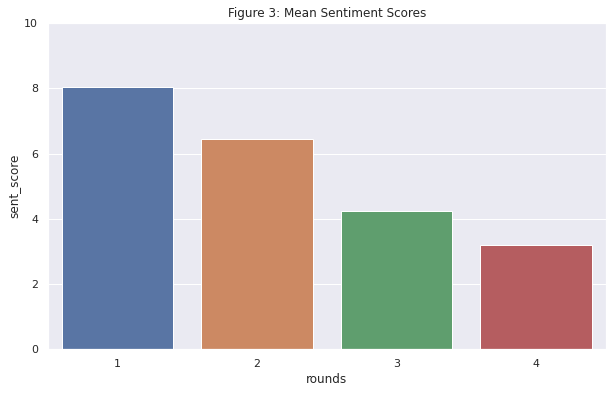

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x=[1,2,3,4], y = mean_sent )
ax.set(ylim=(0, 10), title="Figure 3: Mean Sentiment Scores", xlabel="rounds" )

[(0.0, 10.0)]

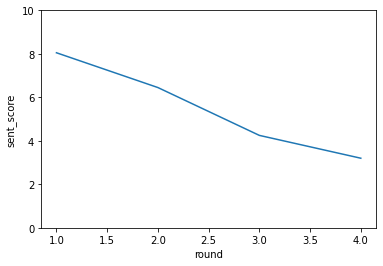

In [ ]:
ax = sns.lineplot(data=mean_sent)
ax.set(ylim=(0, 10))

[(0.0, 10.0)]

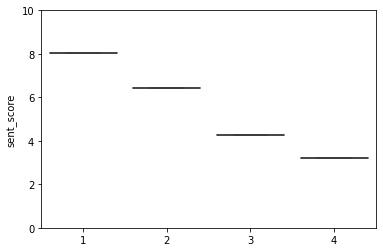

In [ ]:
ax = sns.boxplot(x=[1,2,3,4], y = mean_sent ,)

ax.set(ylim=(0, 10))


In [ ]:
sentiment_scores

,sent_score,round,group
0,9.0,1.0,group_1
1,7.0,1.0,group_10
2,5.5,1.0,group_2
3,8.0,1.0,group_3
4,9.0,1.0,group_4
5,9.5,1.0,group_5
6,10.0,1.0,group_6
7,8.5,1.0,group_7
8,8.0,1.0,group_8
9,6.0,1.0,group_9


# 3. Analysis

In [ ]:
y_it = beta_0 + beta_1*score + F_i + T_t + u_it

TR1: y_it_1 = beta_0 + F_i + T_t + u_it_1
TR2: y_it_2 = beta_0 + beta_1*score + F_i + T_t + u_it_2

y_it_2 - y_it_1 = beta_1*score + u_it_3

In [ ]:
tr1_data

In [ ]:
contribution = beta0 + beta1*is_chat

tr_2_contr / tr_1_contr =  beta0 + beta1*cooperation_score + beta2*round

tr_2_contr = beta0 + beta1*cooperation_score + beta2*tr_1_contr 

tr_2_contr = beta0 + beta1*cooperation_score + beta2*round 

group_means = beta0 + beta1*group_cooperationscore



In [ ]:
groups

,tr2_id,name,gm1,gm2,gm3,group
0,1,Elif Kurt,2,28,29,group_1
1,2,Ipek Gur,28,1,29,group_1
2,3,yunus emre bilgili,23,14,4,group_2
3,4,gokhan seheri,3,23,14,group_2
4,5,cem erciyastepe,21,7,39,group_3
5,6,su akarsu,27,34,37,group_4
6,7,Kaan Basdil,21,5,39,group_3
7,8,emrecan yerlikaya,30,31,20,group_5
8,9,Evrim Belli,25,26,10,group_6
9,10,oguz turan,25,26,9,group_6


In [ ]:
# ID correction for round 1:

for i in tr1_data.index:
  t1_id = tr1_data.loc[i, "ID"]
  tr1_data.loc[i, "ID"] =  groups.loc[groups.tr1_id==t1_id, "tr2_id"].values[0]

In [ ]:
tr1_data = tr1_data.sort_values(by=["Round", "ID"]).set_index(["Round", "ID"]) 
tr2_data = exp_data.set_index(["Round", "ID"]) 

In [ ]:
y = tr2_data.Contribution - tr1_data.Contribution

In [ ]:
sentiment_scores.columns = ["sent_score", "Round", "group", "ID"]
sentiment_scores = sentiment_scores.set_index(["Round", "ID"])

In [ ]:
y

Round  ID
1      1      75.0
       2       0.0
       3       0.0
       4      50.0
       5     100.0
             ...  
4      36      0.0
       37      0.0
       38    -55.0
       39    100.0
       40      0.0
Name: Contribution, Length: 160, dtype: float64

In [ ]:
sentiment_scores["constant"] = 1

In [ ]:
sentiment_scores

sent_score    group  constant
Round ID                               
1.0   1          9.0  group_1         1
      2          9.0  group_1         1
      3          5.5  group_2         1
      4          5.5  group_2         1
      5          8.0  group_3         1
...              ...      ...       ...
4.0   36         0.0  group_9         1
      37         6.0  group_4         1
      38         0.0  group_9         1
      39         4.0  group_3         1
      40         0.0  group_9         1

[160 rows x 3 columns]

In [ ]:
X = sentiment_scores[["sent_score"]]

In [ ]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Contribution   R-squared (uncentered):                   0.111
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              19.86
Date:                Sun, 23 May 2021   Prob (F-statistic):                    1.56e-05
Time:                        20:40:16   Log-Likelihood:                         -820.08
No. Observations:                 160   AIC:                                      1642.
Df Residuals:                     159   BIC:                                      1645.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sent_score     2.3384      0.525      4.457      0.000       1.302       3.375
==============================================================================
Omnibus:                        5.893   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.600
Skew:                           0.451   Prob(JB):                       0.0608
Kurtosis:                       3.163   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# TR2 with dummy variables:

tr2_data["cooperation_score"] = sentiment_scores.sent_score
tr2_data = tr2_data.reset_index()

round_dm = pd.get_dummies(tr2_data.Round)
round_dm.columns = ["round_1", "round_2", "round_3", "round_4"]
tr2_data = tr2_data.merge(round_dm, how="left", right_index=True, left_index=True)

id_dm = pd.get_dummies(tr2_data.ID)
tr2_data = tr2_data.merge(id_dm, how="left", right_index=True, left_index=True)
tr2_data

,Round,ID,Contribution,Earnings,Cumulative Earnings,Other Id:,cooperation_score,round_1,round_2,round_3,round_4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,1,1,100.0,300.0,310.00,"ID2:0, ID28:100, ID29:100",9.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0.0,500.0,510.00,"ID28:100, ID1:100, ID29:100",9.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,0.0,315.0,325.00,"ID23:0, ID14:15, ID4:100",5.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,100.0,115.0,125.00,"ID3:0, ID23:0, ID14:15",5.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,100.0,210.0,220.00,"ID21:10, ID7:0, ID39:100",8.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4,36,0.0,270.0,"1,000.00","ID40:0, ID13:70, ID38:0",0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
156,4,37,0.0,300.0,"1,280.00","ID27:0, ID34:100, ID6:0",6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
157,4,38,0.0,270.0,"1,000.00","ID40:0, ID36:0, ID13:70",0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
158,4,39,100.0,189.0,814.00,"ID21:89, ID5:0, ID7:0",4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
tr2_data["constant"] = 1

In [ ]:
sm.OLS(tr2_data.Contribution, tr2_data.drop(['Round','ID','Contribution','Earnings', 'Cumulative Earnings','Other Id:',],1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Contribution   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     2.760
Date:                Sun, 23 May 2021   Prob (F-statistic):           8.74e-06
Time:                        20:51:41   Log-Likelihood:                -769.14
No. Observations:                 160   AIC:                             1626.
Df Residuals:                     116   BIC:                             1762.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
cooperation_score     2.6324      1.631      1.614      0.109      -0.599       5.864
round_1              16.7935      7.629      2.201      0.030       1.683      31.904
round_2              12.9553      5.833      2.221      0.028       1.402      24.509
round_3              -1.4034      4.800     -0.292      0.771     -10.910       8.103
round_4             -12.9643      5.184     -2.501      0.014     -23.232      -2.697
1                    20.2440     17.317      1.169      0.245     -14.055      54.543
2                   -29.0060     17.317     -1.675      0.097     -63.305       5.293
3                   -36.7451     17.315     -2.122      0.036     -71.040      -2.450
4                    -4.4951     17.315     -0.260      0.796     -38.790      29.800
5                     8.4663     17.175      0.493      0.623     -25.551      42.484
6                   -12.3242     17.343     -0.711      0.479     -46.674      22.025
7                   -34.0337     17.175     -1.982      0.050     -68.051      -0.016
8                    -5.4141     17.269     -0.314      0.754     -39.618      28.789
9                     4.7825     17.175      0.278      0.781     -29.236      38.801
10                   -7.7175     17.175     -0.449      0.654     -41.736      26.301
11                  -10.3499     17.213     -0.601      0.549     -44.443      23.743
12                  -19.6918     17.189     -1.146      0.254     -53.737      14.354
13                   19.0602     17.442      1.093      0.277     -15.486      53.606
14                  -24.4951     17.315     -1.415      0.160     -58.790       9.800
15                  -36.4951     17.315     -2.108      0.037     -70.790      -2.200
16                   13.0049     17.315      0.751      0.454     -21.290      47.300
17                  -11.9951     17.315     -0.693      0.490     -46.290      22.300
18                   27.1501     17.213      1.577      0.117      -6.943      61.243
19                  -32.4951     17.315     -1.877      0.063     -66.790       1.800
20                  -20.4141     17.269     -1.182      0.240     -54.618      13.789
21                   24.4663     17.175      1.425      0.157      -9.551      58.484
22                    9.0582     17.189      0.527      0.599     -24.987      43.104
23                  -34.4951     17.315     -1.992      0.049     -68.790      -0.200
24                   -3.4418     17.189     -0.200      0.842     -37.487      30.604
25                   29.7825     17.175      1.734      0.086      -4.236      63.801
26                    1.0325     17.175      0.060      0.952     -32.986      35.051
27                   20.1758     17.343      1.163      0.247     -14.174      54.525
28                   20.2440     17.317      1.169      0.245     -14.055

In [ ]:
sm.OLS(tr2_data.Contribution, tr2_data[["constant", "cooperation_score",	"round_1",	"round_2",	"round_4"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Contribution   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     7.695
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.11e-05
Time:                        21:34:07   Log-Likelihood:                -811.02
No. Observations:                 160   AIC:                             1632.
Df Residuals:                     155   BIC:                             1647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant             17.6000      8.907      1.976      0.050       0.005      35.195
cooperation_score     1.8706      1.509      1.239      0.217      -1.111       4.852
round_1              21.0918     10.454      2.018      0.045       0.441      41.742
round_2              16.0347      9.350      1.715      0.088      -2.434      34.504
round_4             -12.3609      8.883     -1.392      0.166     -29.908       5.186
==============================================================================
Omnibus:                       29.081   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.623
Skew:                           0.486   Prob(JB):                      0.00182
Kurtosis:                       2.027   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#tr2 = beta_0 + beta_1*tr_1 

In [ ]:
#contribution_it = beta_0 + beta_1*is_chat + round_dummies + individual_dummies

In [ ]:
tr1_data = tr1_data.reset_index()

# HIPOTEZ 1: is_chat etkisi

,Round,ID,Contribution,Earnings,Cumulative Earnings,Other Id:
0,1,1,25,245.00,255.00,"ID11:0, ID5:50, ID12:20"
1,1,2,0,293.00,303.00,"ID2:0, ID20:93, ID28:0"
2,1,3,0,350.00,360.00,"ID1:0, ID40:50, ID30:100"
3,1,4,50,250.00,260.00,"ID7:0, ID1:0, ID30:100"
4,1,5,0,277.00,287.00,"ID10:2, ID24:75, ID39:0"
...,...,...,...,...,...,...
155,4,36,0,260.00,"1,015.00","ID3:0, ID21:0, ID8:60"
156,4,37,0,200.00,"1,189.00","ID17:0, ID9:0, ID26:0"
157,4,38,55,335.00,"1,279.00","ID38:30, ID6:60, ID36:100"
158,4,39,0,260.00,"1,415.00","ID3:0, ID33:0, ID8:60"


In [ ]:
# TR1 with dummy variables:
tr1_data["constant"] = 1

round_dm = pd.get_dummies(tr1_data.Round)
round_dm.columns = ["round_1", "round_2", "round_3", "round_4"]
tr1_data = tr1_data.merge(round_dm, how="left", right_index=True, left_index=True)

id_dm = pd.get_dummies(tr1_data.ID)
tr1_data = tr1_data.merge(id_dm, how="left", right_index=True, left_index=True)
tr1_data

,Round,ID,Contribution,Earnings,Cumulative Earnings,Other Id:,constant,round_1,round_2,round_3,round_4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,1,1,25,245.00,255.00,"ID11:0, ID5:50, ID12:20",1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,293.00,303.00,"ID2:0, ID20:93, ID28:0",1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,0,350.00,360.00,"ID1:0, ID40:50, ID30:100",1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,50,250.00,260.00,"ID7:0, ID1:0, ID30:100",1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,0,277.00,287.00,"ID10:2, ID24:75, ID39:0",1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4,36,0,260.00,"1,015.00","ID3:0, ID21:0, ID8:60",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
156,4,37,0,200.00,"1,189.00","ID17:0, ID9:0, ID26:0",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
157,4,38,55,335.00,"1,279.00","ID38:30, ID6:60, ID36:100",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
158,4,39,0,260.00,"1,415.00","ID3:0, ID33:0, ID8:60",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
tr2_data

,Round,ID,Contribution,Earnings,Cumulative Earnings,Other Id:,cooperation_score,round_1,round_2,round_3,round_4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,constant,treatment,is_chat
0,1,1,100.0,300.0,310.00,"ID2:0, ID28:100, ID29:100",9.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
1,1,2,0.0,500.0,510.00,"ID28:100, ID1:100, ID29:100",9.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
2,1,3,0.0,315.0,325.00,"ID23:0, ID14:15, ID4:100",5.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
3,1,4,100.0,115.0,125.00,"ID3:0, ID23:0, ID14:15",5.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
4,1,5,100.0,210.0,220.00,"ID21:10, ID7:0, ID39:100",8.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4,36,0.0,270.0,"1,000.00","ID40:0, ID13:70, ID38:0",0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1
156,4,37,0.0,300.0,"1,280.00","ID27:0, ID34:100, ID6:0",6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1
157,4,38,0.0,270.0,"1,000.00","ID40:0, ID36:0, ID13:70",0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1
158,4,39,100.0,189.0,814.00,"ID21:89, ID5:0, ID7:0",4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1


In [ ]:
tr1_data["treatment"] = 1
tr2_data["treatment"] = 2

tr1_data["is_chat"] = 0
tr2_data["is_chat"] = 1

In [ ]:
all_data = tr2_data.append(tr1_data, ignore_index=True)

In [ ]:
all_data = all_data.sort_values(["treatment", "Round", "ID"]).reset_index()
all_data

,index,Round,ID,Contribution,Earnings,Cumulative Earnings,Other Id:,cooperation_score,round_1,round_2,round_3,round_4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,constant,treatment,is_chat
0,160,1,1,25.0,245.00,255.00,"ID11:0, ID5:50, ID12:20",NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,161,1,2,0.0,293.00,303.00,"ID2:0, ID20:93, ID28:0",NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,162,1,3,0.0,350.00,360.00,"ID1:0, ID40:50, ID30:100",NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,163,1,4,50.0,250.00,260.00,"ID7:0, ID1:0, ID30:100",NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,164,1,5,0.0,277.00,287.00,"ID10:2, ID24:75, ID39:0",NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,155,4,36,0.0,270,"1,000.00","ID40:0, ID13:70, ID38:0",0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1
316,156,4,37,0.0,300,"1,280.00","ID27:0, ID34:100, ID6:0",6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1
317,157,4,38,0.0,270,"1,000.00","ID40:0, ID36:0, ID13:70",0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1
318,158,4,39,100.0,189,814.00,"ID21:89, ID5:0, ID7:0",4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1


In [ ]:
all_data = all_data.drop(["index", 'Earnings', 'Cumulative Earnings', 'Other Id:'],1)

In [ ]:
sm.OLS(all_data.Contribution, all_data[["constant", "is_chat"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Contribution   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.513
Date:                Sun, 23 May 2021   Prob (F-statistic):            0.00378
Time:                        21:25:38   Log-Likelihood:                -1600.5
No. Observations:                 320   AIC:                             3205.
Df Residuals:                     318   BIC:                             3212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      22.2875      2.852      7.814      0.000      16.676      27.899
is_chat       11.7687      4.033      2.918      0.004       3.833      19.704
==============================================================================
Omnibus:                       45.528   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.227
Skew:                           0.867   Prob(JB):                     9.16e-11
Kurtosis:                       2.323   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
all_data

,Round,ID,Contribution,cooperation_score,round_1,round_2,round_3,round_4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,constant,treatment,is_chat
0,1,1,25.0,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,2,0.0,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,1,3,0.0,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,4,50.0,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,5,0.0,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,4,36,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1
316,4,37,0.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1
317,4,38,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1
318,4,39,100.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1


In [ ]:
sm.OLS(all_data.Contribution, all_data[["constant", "is_chat", "round_1",	"round_2",	"round_3",	"round_4"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Contribution   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     13.00
Date:                Sun, 23 May 2021   Prob (F-statistic):           8.22e-10
Time:                        21:27:07   Log-Likelihood:                -1580.2
No. Observations:                 320   AIC:                             3170.
Df Residuals:                     315   BIC:                             3189.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      17.8300      2.152      8.285      0.000      13.596      22.064
is_chat       11.7687      3.804      3.093      0.002       4.283      19.254
round_1       19.1731      3.338      5.743      0.000      12.605      25.741
round_2       12.7106      3.338      3.807      0.000       6.142      19.279
round_3       -1.2894      3.338     -0.386      0.700      -7.858       5.279
round_4      -12.7644      3.338     -3.824      0.000     -19.333      -6.196
==============================================================================
Omnibus:                       29.918   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.855
Skew:                           0.766   Prob(JB):                     4.45e-08
Kurtosis:                       2.564   Cond. No.                     3.29e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
sm.OLS(all_data.Contribution, all_data.drop(["Round",	"ID",	"Contribution","cooperation_score", "treatment"], 1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Contribution   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     5.145
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.21e-17
Time:                        21:28:22   Log-Likelihood:                -1510.5
No. Observations:                 320   AIC:                             3109.
Df Residuals:                     276   BIC:                             3275.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
round_1       19.0857      2.867      6.658      0.000      13.442      24.729
round_2       12.6232      2.867      4.403      0.000       6.980      18.267
round_3       -1.3768      2.867     -0.480      0.631      -7.020       4.267
round_4      -12.8518      2.867     -4.483      0.000     -18.495      -7.208
1             26.0151     10.206      2.549      0.011       5.923      46.107
2            -27.3599     10.206     -2.681      0.008     -47.452      -7.268
3            -27.6099     10.206     -2.705      0.007     -47.702      -7.518
4              1.0151     10.206      0.099      0.921     -19.077      21.107
5             -6.4849     10.206     -0.635      0.526     -26.577      13.607
6            -14.3599     10.206     -1.407      0.161     -34.452       5.732
7            -27.7349     10.206     -2.717      0.007     -47.827      -7.643
8              3.3901     10.206      0.332      0.740     -16.702      23.482
9              1.6401     10.206      0.161      0.872     -18.452      21.732
10            -8.9849     10.206     -0.880      0.379     -29.077      11.107
11           -15.2349     10.206     -1.493      0.137     -35.327       4.857
12            -9.6099     10.206     -0.942      0.347     -29.702      10.482
13             8.5151     10.206      0.834      0.405     -11.577      28.607
14           -15.4849     10.206     -1.517      0.130     -35.577       4.607
15           -27.4849     10.206     -2.693      0.008     -47.577      -7.393
16            27.2651     10.206      2.671      0.008       7.173      47.357
17             1.0151     10.206      0.099      0.921     -19.077      21.107
18            25.3901     10.206      2.488      0.013       5.298      45.482
19           -21.1099     10.206     -2.068      0.040     -41.202      -1.018
20           -12.7349     10.206     -1.248      0.213     -32.827       7.357
21            16.5151     10.206      1.618      0.107      -3.577      36.607
22            24.1401     10.206      2.365      0.019       4.048      44.232
23           -26.4849     10.206     -2.595      0.010     -46.577      -6.393
24             2.7651     10.206      0.271      0.787     -17.327      22.857
25            13.5151     10.206      1.324      0.187      -6.577      33.607
26             2.8901     10.206      0.283      0.777     -17.202      22.982
27             1.3901     10.206      0.136      0.892     -18.702      21.482
28             7.8901     10.206      0.773      0.440     -12.202      27.982
29            36.0151     10.206      3.529      0.000      15.923      56.107
30           -18.9849     10.206     -1.860      0.064     -39.077       1.107
31            -7.1099     10.206     -0.697      0.487     -27.202      12.982
32            17.8901     10.206      1.753      0.081      -2.202      37.982
33

Yiğit hocaya sorular:

1. 2 hipotezi düşündük (hipotezleri anlat) bunlar mantıklı mı?
2. Yaptığın regresyonlarda bir hata var mı hangisi kullanılmalı?

In [ ]:
all_data.groupby(["treatment", "Round"]).Contribution.std()

treatment  Round
1          1        30.725824
           2        28.557230
           3        27.783227
           4        23.105541
2          1        43.834625
           2        45.612751
           3        36.455769
           4        28.305556
Name: Contribution, dtype: float64

In [ ]:
all_data.to_excel("/content/drive/My Drive/EC 438 experiment/all_data.xlsx", index=False)

In [ ]:
all_data = pd.read_excel("/content/drive/My Drive/EC 438 experiment/all_data.xlsx")

In [ ]:
all_data.loc[all_data.treatment==2 , "Round"] = all_data.loc[all_data.treatment==2 , "Round"] +4

In [ ]:
all_data.to_excel("/content/drive/My Drive/EC 438 experiment/all_data2.xlsx", index=False)

In [ ]:
all_data = all_data.set_index(["Round", "ID"])

# Graphs 

In [ ]:
all_data

,Round,ID,Contribution,cooperation_score,round_1,round_2,round_3,round_4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,constant,treatment,is_chat
0,1,1,25,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,2,0,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,1,3,0,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,4,50,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,5,0,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,4,36,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1
316,4,37,0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1
317,4,38,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1
318,4,39,100,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1


In [ ]:
mean_cont = all_data.groupby(["treatment", "Round"]).Contribution.mean()[1].to_frame("No Chat")
mean_cont["With chat"] = all_data.groupby(["treatment", "Round"]).Contribution.mean()[2]
mean_cont["Equlibrium"] = 0

In [ ]:
mean_cont

,No Chat,With chat,Equlibrium
Round,,,
1,32.025,53.750,0
2,27.150,45.700,0
3,19.300,25.550,0
4,10.675,11.225,0


[(0.0, 100.0),
 Text(0, 0.5, 'Contribution'),
 Text(0.5, 1.0, 'Fig 1: Mean Contributions')]

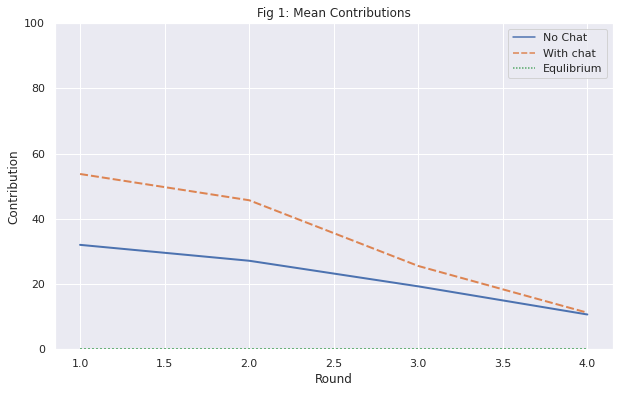

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(data = mean_cont,linewidth = 2)
ax.set(ylim=(0, 100), ylabel="Contribution", title = "Fig 1: Mean Contributions")

In [ ]:
all_data.groupby(["treatment", "Round"]).Contribution

In [ ]:
all_data.loc[all_data.treatment==1,:].Contribution

Round
1    25
1     0
1     0
1    50
1     0
     ..
4     0
4     0
4    55
4     0
4     0
Name: Contribution, Length: 160, dtype: int64

Text(0.5, 1.0, 'Fig 2: Boxplots of Contributions')

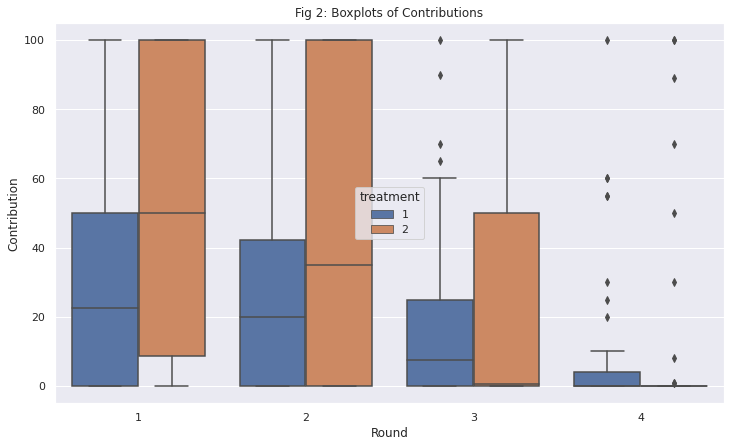

In [ ]:
sns.set(rc={'figure.figsize':(12,7)})
sns.boxplot(x="Round" , y= "Contribution", hue = "treatment", data = all_data).set_title("Fig 2: Boxplots of Contributions")